In [1]:
#!pip install flake8
#!pip install pycodestyle
#!pip install pycodestyle_magic
!pip install mglearn
!pip install wordcloud
!pip install opencv-python

!pip install spacy
!pip install Pillow

'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

In [3]:
data = pd.read_csv(r"C:\Users\Jordan\Desktop\flipkart_com-ecommerce_sample_1050.csv",sep=',', error_bad_lines=False, low_memory=False)

C:\Users\Jordan\AppData\Local\Temp\ipykernel_15812\3898044917.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(r"C:\Users\Jordan\Desktop\flipkart_com-ecommerce_sample_1050.csv",sep=',', error_bad_lines=False, low_memory=False)


In [4]:
data.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

Nous allons commencer par créer un dataset avec uniquement les features qui nous intéresse pour ce projet, et ensuite analyser l'arbre de chaque catégorie de produits de notre jeu de données pour en extraire les sous-catégories.

In [5]:
df_train = data.loc[:, ["description", "product_category_tree"]]

# On crée une liste de strings en supprimant les >>
df = df_train["product_category_tree"].str.split(">>")

# Et on ne récupère que la deuxième valeur de la liste
# Ce qui correspondra à notre catégorie de produits
df_train["sous_cat_1"] = df.apply(lambda x: x[0])
df_train["sous_cat_2"] = df.apply(lambda x: x[1])

In [6]:
print("Il y a {} produits dans la sous-catégorie 1.".format(len(df_train["sous_cat_1"].unique())))
print("Il y a {} produits dans la sous-catégorie 2.".format(len(df_train["sous_cat_2"].unique())))

Il y a 7 produits dans la sous-catégorie 1.
Il y a 63 produits dans la sous-catégorie 2.


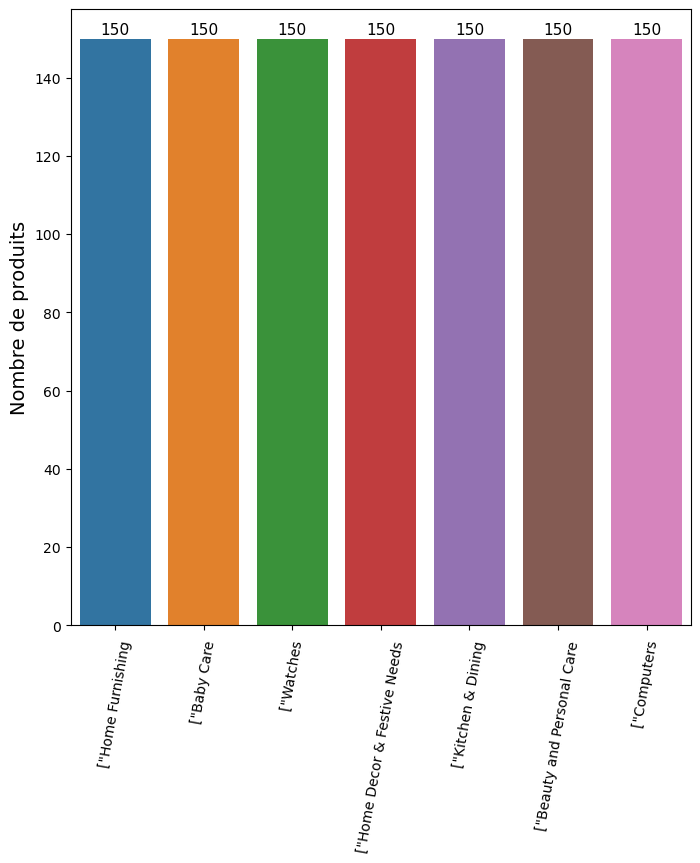

In [7]:
# On commence par faire le comptage de la sous catégorie 1
plt.figure(figsize=(8, 8))
    
plt.xticks(rotation=80)

val = df_train["sous_cat_1"].value_counts()
val = pd.DataFrame(val)

sns.barplot(x=val.index, y=val["sous_cat_1"])

plt.ylabel("Nombre de produits", size=14)

for i, v in enumerate(val["sous_cat_1"].values):
    plt.text(i, v+1, v, color='black', ha='center', size=11)

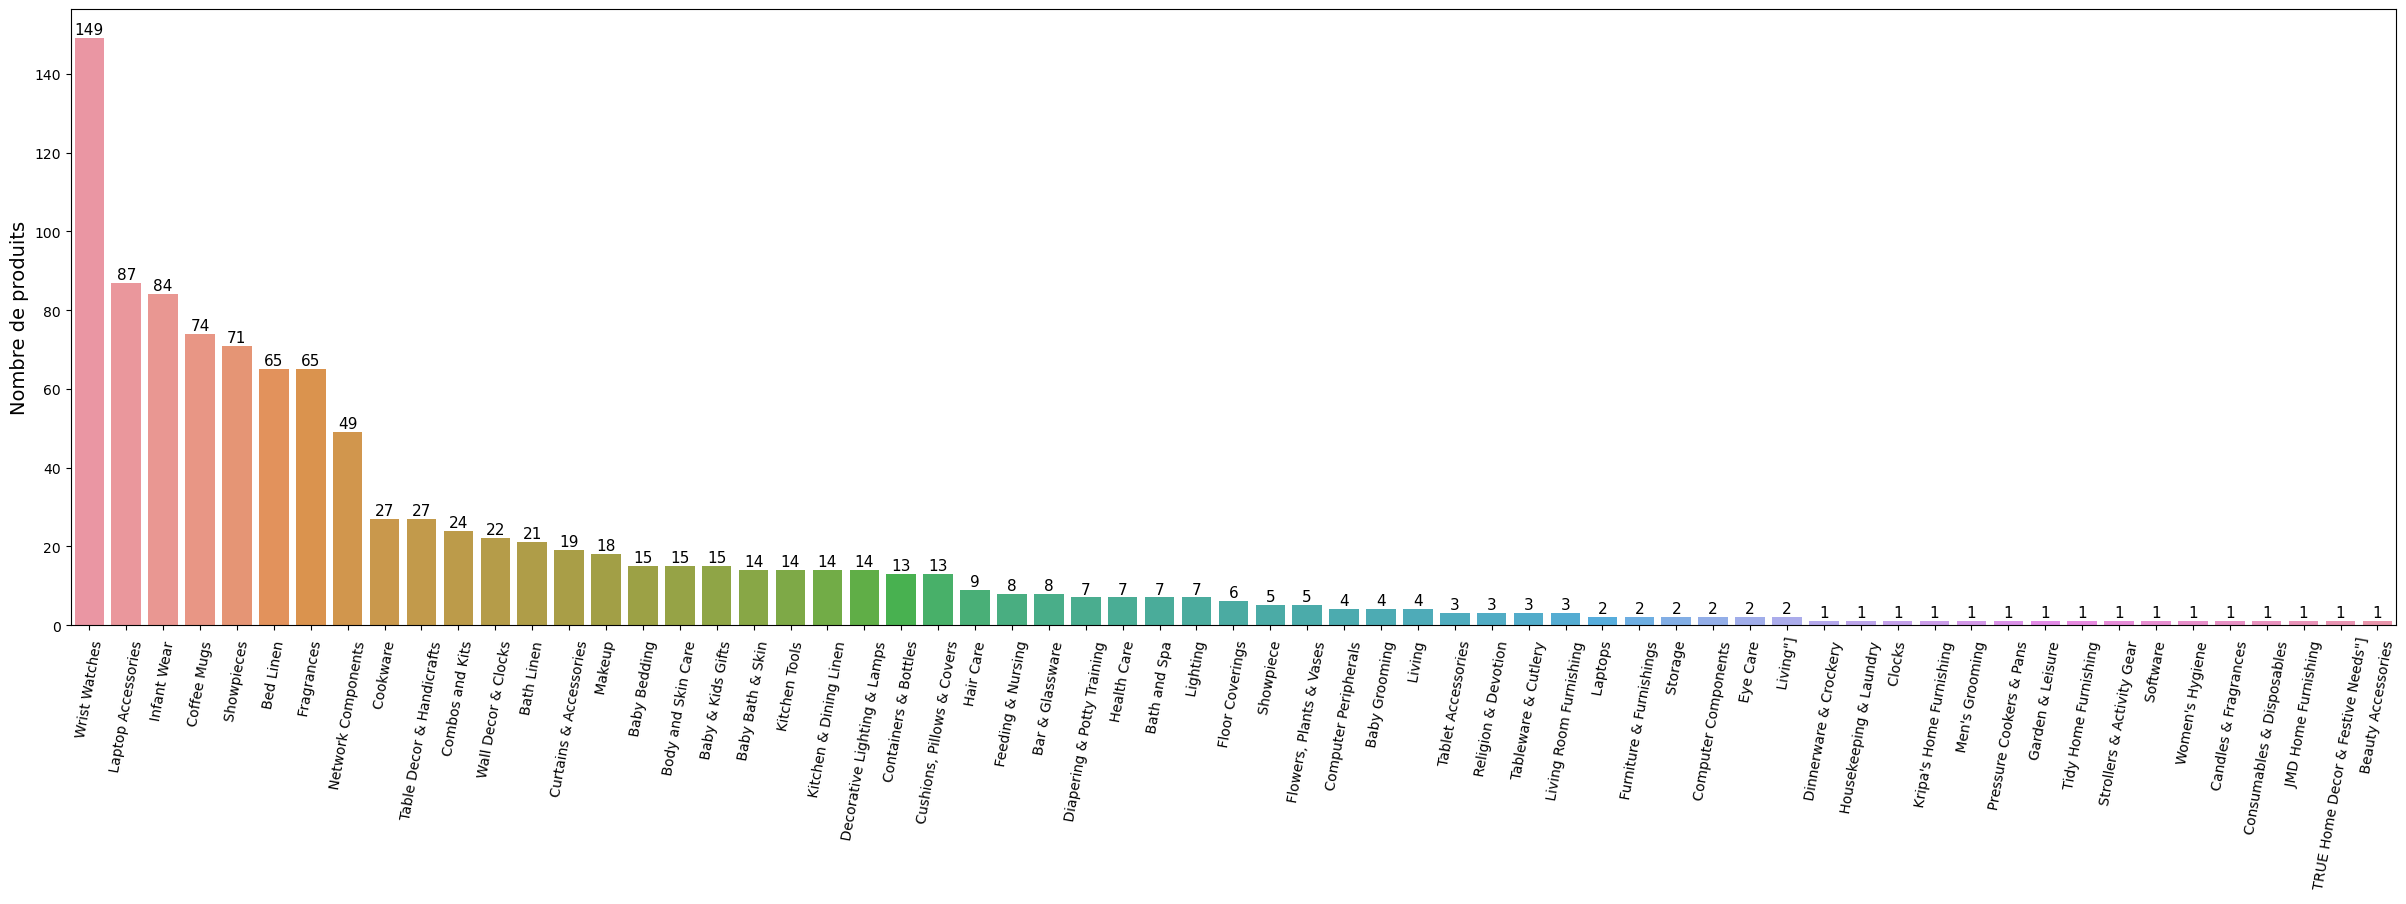

In [8]:
# On commence par faire le comptage de la sous catégorie 1
plt.figure(figsize=(30, 8))
    
plt.xticks(rotation=80)

val = df_train["sous_cat_2"].value_counts()
val = pd.DataFrame(val)

sns.barplot(x=val.index, y=val["sous_cat_2"])

plt.ylabel("Nombre de produits", size=14)

for i, v in enumerate(val["sous_cat_2"].values):
    plt.text(i, v+1, v, color='black', ha='center', size=11)

In [10]:
import nltk

from nltk.tokenize import RegexpTokenizer

# Combine all training text into one large string
all_des = ' '.join([text for text in df_train["description"]])

# Ce tokenizer ne capture que les mots capitalisés
capword_tokenizer = RegexpTokenizer("[A-Z]\w+")
all_des_tokened = capword_tokenizer.tokenize(all_des)

display("Nombre de mots au total dans les descriptions:", len(all_des_tokened))

'Nombre de mots au total dans les descriptions:'

41803

In [11]:
df_train["sous_cat_2"] = df_train["sous_cat_2"].str.strip()
des = df_train[df_train["sous_cat_2"] == "Wrist Watches"]

# On récupère toutes les descriptions de la catégorie
# On en forme une chaîne de caractères
des_text = ' '.join(text for text in des["description"])

# On fait une tokenisation de cete chaine
# avec le tokenizer construit précédemment
# On ne garde que les mots capitalisés
des_text_tokenized = capword_tokenizer.tokenize(des_text)

# On recrée une chaîne "propre"
des_text_tokenized = ' '.join(des_text_tokenized)

C:\Users\Jordan\AppData\Local\Temp\ipykernel_15812\862720838.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.0, 'Mots les plus communs dans la catégorie la plus fournie')

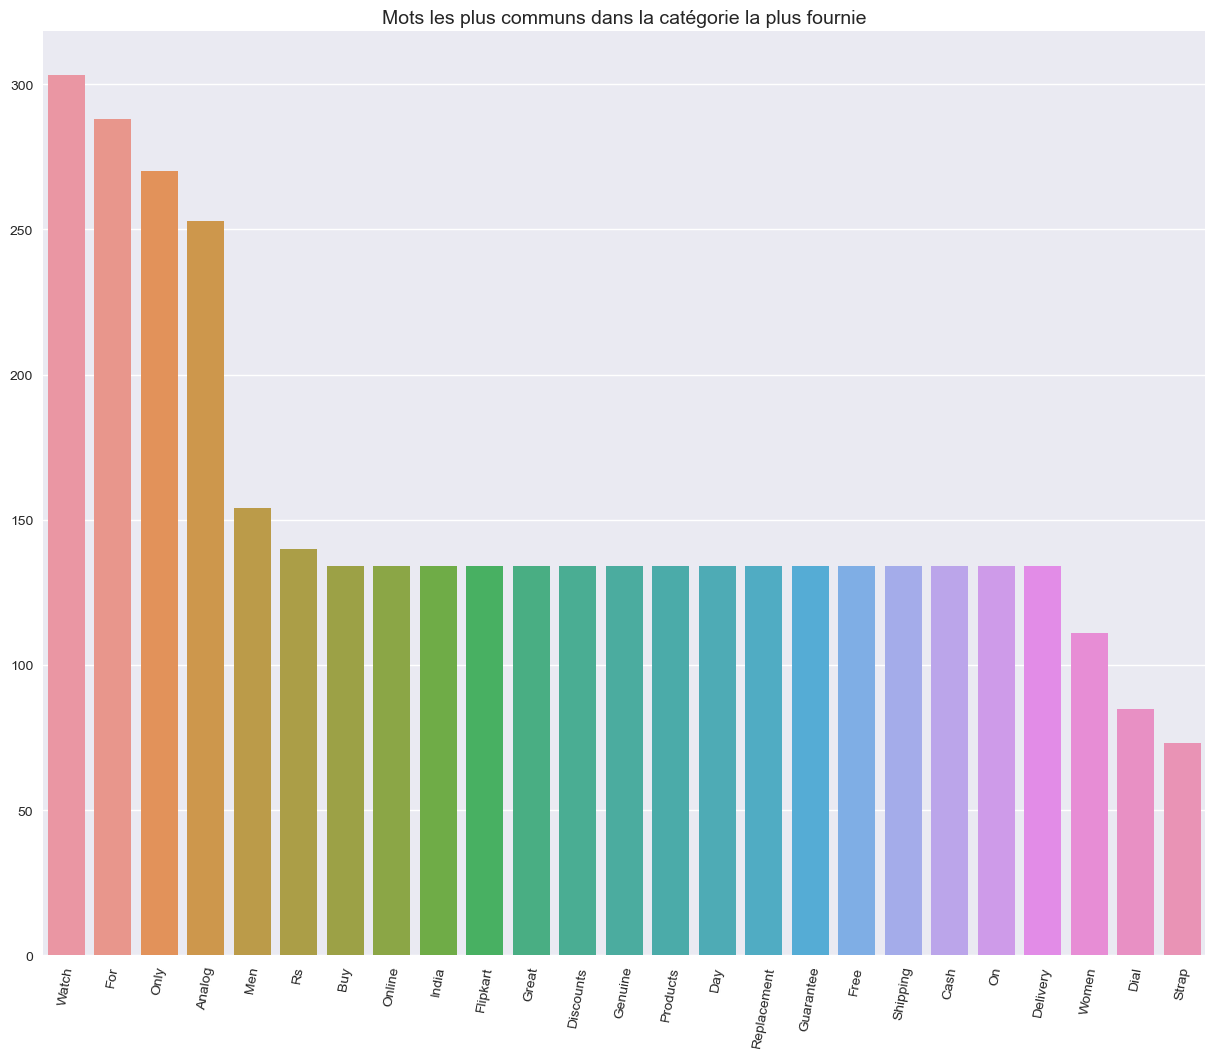

In [12]:
from collections import Counter

des_list = des_text_tokenized.split()
des_counts = Counter(des_list)
des_common_words = [word[0] for word in des_counts.most_common(25)]
des_common_counts = [word[1] for word in des_counts.most_common(25)]

plt.style.use('seaborn')
plt.figure(figsize=(15, 12))
plt.xticks(rotation=80)
sns.barplot(x=des_common_words, y=des_common_counts)
plt.title("Mots les plus communs dans la catégorie la plus fournie", size=14)

In [13]:
def clean_sous_cat_1(text):
    text = text[2:]
    return text

In [14]:
des_train = df_train["description"]
des_target = df_train["sous_cat_1"]

#On nettoie le nom des catégories
des_target = des_target.apply(clean_sous_cat_1)

print(des_train[:5])
print("------------------------")
print(des_target[:5])

0    Key Features of Elegance Polyester Multicolor ...
1    Specifications of Sathiyas Cotton Bath Towel (...
2    Key Features of Eurospa Cotton Terry Face Towe...
3    Key Features of SANTOSH ROYAL FASHION Cotton P...
4    Key Features of Jaipur Print Cotton Floral Kin...
Name: description, dtype: object
------------------------
0    Home Furnishing 
1          Baby Care 
2          Baby Care 
3    Home Furnishing 
4    Home Furnishing 
Name: sous_cat_1, dtype: object


In [15]:
def clean_description(description):
    
    # Ce tokenizer ne capture que les mots capitalisés
    capword_tokenizer = RegexpTokenizer("[A-Z]\w+")
    des_tokenized = capword_tokenizer.tokenize(description)
    
    # On recrée une chaîne "propre"
    des_tokenized = ' '.join(des_tokenized)
    
    return des_tokenized.lower()

In [16]:
des_train = des_train.apply(clean_description)
des_train[:5]

0    key features elegance polyester multicolor abs...
1    specifications sathiyas cotton bath towel bath...
2    key features eurospa cotton terry face towel s...
3    key features santosh royal fashion cotton prin...
4    key features jaipur print cotton floral king d...
Name: description, dtype: object

In [17]:

def extract_mots(data, min_df, stopwords):
    
    vect = CountVectorizer(min_df=min_df, stop_words=stopwords).fit(data)
    X_train = vect.transform(data)
    
    return [vect, X_train]

In [18]:
def check_vocabulaire(vect):
    
    feature_names = vect.get_feature_names_out()
    print("Nombre de features :", len(feature_names))
    print("20 premières features :", feature_names[:20])
    print("20 dernières features :", feature_names[-20:])

In [19]:
def calcul_performance(X_train, des_target):
    
    param_dist = {'C': [0.001, 0.01, 0.1, 1, 10]}
    random_search = RandomizedSearchCV(LogisticRegression(),
                            param_distributions=param_dist,
                            cv=2,
                            iid=False)

    random_search.fit(X_train, des_target)
    
    return random_search

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

vect, X_train = extract_mots(des_train, 0, [])
print("X_train:\n", format(repr(X_train)))

X_train:
 <1050x3777 sparse matrix of type '<class 'numpy.int64'>'
	with 27754 stored elements in Compressed Sparse Row format>


In [21]:
check_vocabulaire(vect)

Nombre de features : 3777
20 premières features : ['a200' 'a37' 'a5' 'a55' 'a6' 'aa' 'aaa' 'aapno' 'aari' 'aarika'
 'abkl_grn_grn_grn' 'abkl_pl_pl_pnk' 'abkl_pl_pnk_pnk' 'about' 'absorbent'
 'absorber' 'abstract' 'abstracts' 'abstrcts' 'ac']
20 dernières features : ['ym22' 'york' 'you' 'young' 'your' 'yourself' 'youth' 'youthful' 'yuva'
 'yves' 'zaicus' 'zero' 'zikrak' 'zingalalaa' 'zip' 'zipper' 'zone' 'zoom'
 'zora' 'zyxel']
